**Outlier Detection Statistical Methods**
1. Z Score
2. Modified Z Score
3. IQR Inter Quartile Range
4. Grubbs Test


**1.Z Score**

This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.

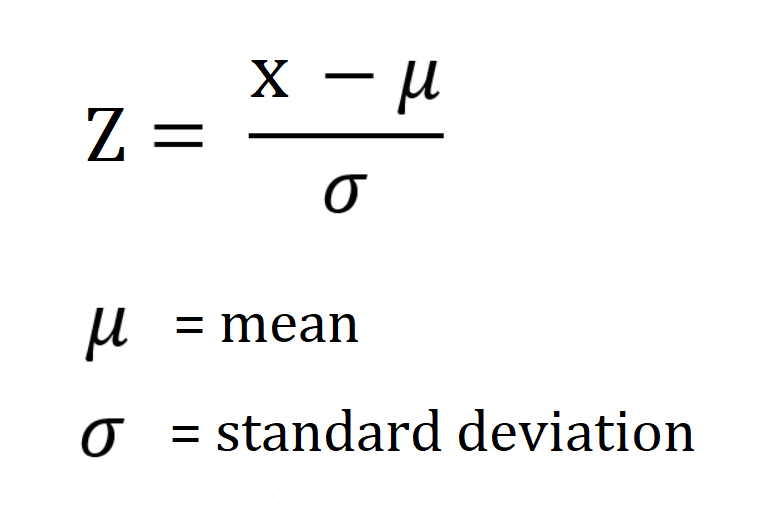

If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

Z-score can be both positive and negative.

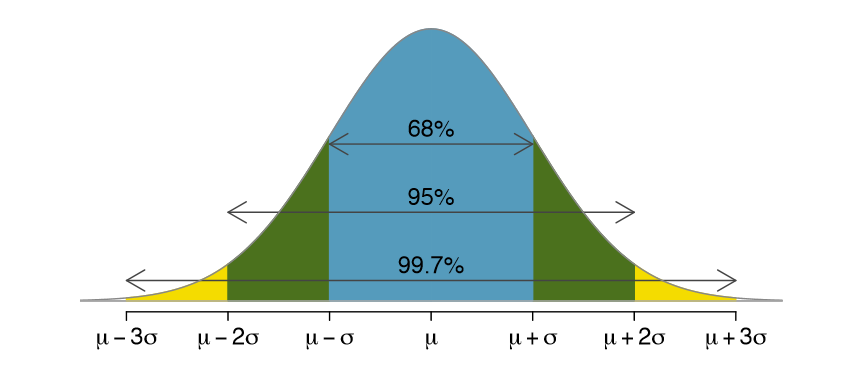

A normal distribution is shown below and it is estimated that:

a) 68% of the data points lie between +/- 1 standard deviation.

b) 95% of the data points lie between +/- 2 standard deviation

c) 99.7% of the data points lie between +/- 3 standard deviation

In [1]:
import pandas as pd
import seaborn as sn

In [2]:
df = pd.read_csv("heights.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


<AxesSubplot:xlabel='height', ylabel='Count'>

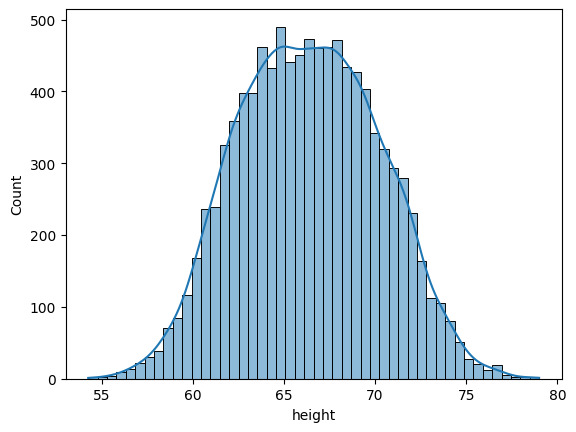

In [4]:
sn.histplot(df.height, kde=True)

In [5]:
mean = df.height.mean()
mean

66.367559754866

In [6]:
std_deviation = df.height.std()
std_deviation

3.847528120795573

In [7]:
mean - 3*std_deviation

54.824975392479274

In [8]:
mean + 3*std_deviation

77.91014411725271

In [13]:
outlier_data = df[(df.height<54.82) | (df.height>77.91)]
outlier_data

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [11]:
df_no_outlier = df[(df.height>54.82) & (df.height<77.91)]
df_no_outlier.shape

(9993, 2)

Z- Score only works with the data which is completely or close to normally distributed, which in turn stimulates that this method is not for skewed data, either left skew or right skew.

**Z- Score Example Using scipy**

In [16]:
import numpy as np
from scipy import stats
import seaborn as sn

In [19]:
data = np.array([1, 2, 3, 4, 5, 100])

In [23]:
outliers = np.abs(z_scores) > 2
print(outliers)

[False False False False False  True]


**2.Modified Z Score**

Used for datasets that may not follow a normal distribution. 
This is based on the median and median absolute deviation (MAD).
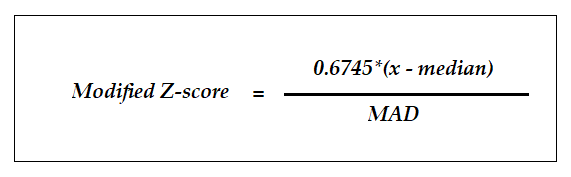

Value's with Modified Z-Scores less than -3.5 or greater than 3.5 be labeled as potential outliers.

**Modified Z- Score Example Using scipy**

In [24]:
import numpy as np
from scipy import stats

In [26]:
data = np.array([1, 2, 3, 4, 5, 100])

In [28]:
mad = stats.median_abs_deviation(data)
modified_z_scores = 0.6745 * (data - np.median(data)) / mad

mad, modified_z_scores

(1.5,
 array([-1.12416667, -0.6745    , -0.22483333,  0.22483333,  0.6745    ,
        43.39283333]))

In [29]:
outliers = np.abs(modified_z_scores) > 3.5
print(outliers)

[False False False False False  True]


**Modified Z- Score Example Using Custom method & using formula**

In [33]:
import pandas as pd
import numpy as np
df = pd.read_csv("C:/Users/DELL/Desktop/Python/movie_revenues.csv")
df['revenue_mln'] = df['revenue'].apply(lambda x: x/1000000)

In [31]:
def get_mad(s):
    median = np.median(s)
    diff = abs(s-median)
    MAD = np.median(diff)
    return MAD

In [32]:
MAD = get_mad(df.revenue_mln)
median = np.median(df.revenue_mln)
MAD, median

(56.399542499999995, 83.8171415)

In [34]:
def get_modified_z_score(x, median, MAD):
    return 0.6745*(x-median)/MAD

In [52]:
df['mod_z_score'] = df.revenue_mln.apply(lambda x: get_modified_z_score(x, median, MAD))
df.shape

(46, 22)

In [57]:
outliers = df[(df.mod_z_score > 3.5) | (df.mod_z_score < -3.5)]
outliers

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,mod_z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,32.339762
7,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...",...,1513528810,124,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662,1513.528810,17.098375
12,25000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 28, ""n...",NaN,619,"[{""id"": 1156, ""name"": ""sister sister relations...",en,The Bodyguard,A former Secret Service agent grudgingly takes...,26.576385,"[{""name"": ""Tig Productions"", ""id"": 335}, {""nam...",...,411006740,129,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Never let her out of your sight. Never let you...,The Bodyguard,6.1,661,411.006740,3.912964


In [58]:
df_no_outlier = df[(df.mod_z_score < 3.5) & (df.mod_z_score > -3.5)]
df_no_outlier.shape

(43, 22)

**3.IQR Inter Quartile Range**
This method is used when your Data is left- or right-skewed.

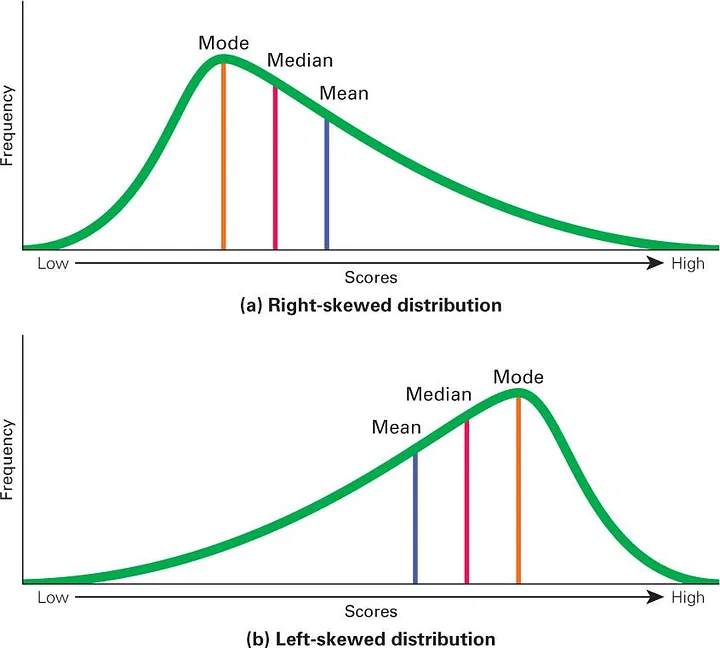

**Box Plot**

Boxplot contain percentiles of 25, 50 (median), 75, and 100.

The IQR method uses the quartiles to detect outliers. Data points that lie outside the range 
[Q1−1.5×IQR,Q3+1.5×IQR] are considered outliers


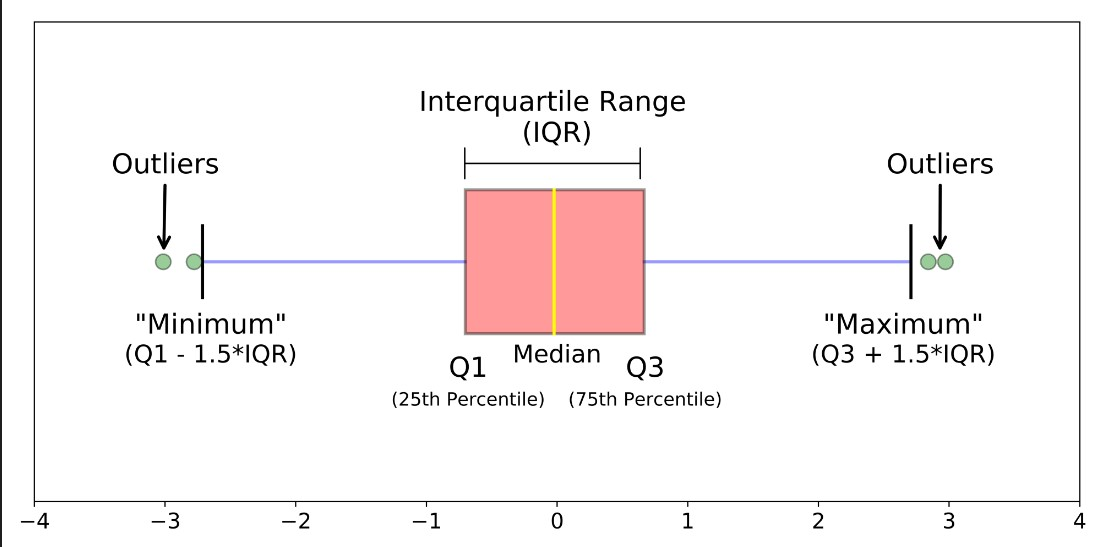

**What is IQR**

The Interquartile Range, or IQR, is a measure of statistical dispersion. It represents the range within which the middle 50% of the data falls. 

IQR = Q3 — Q1

To identify outliers using the IQR method, we establish two boundaries:
Lower Bound: Q1–1.5 * IQR
Upper Bound: Q3 + 1.5 * IQR

<AxesSubplot:>

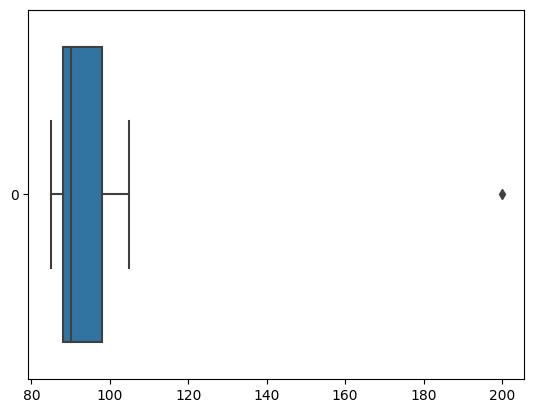

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns

# Sample dataset of exam scores
data = [85, 87, 90, 88, 92, 100, 105, 98, 200, 92, 88, 87, 89]
df = pd.DataFrame(data, columns=["Scores"])

# Calculate Q1, Q3, and IQR
Q1 = np.percentile(df["Scores"], 25)
Q3 = np.percentile(df["Scores"], 75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
sns.boxplot(data, orient = 'h')

In [65]:
# Identify outliers
outliers = df[(df["Scores"] < lower_bound) | (df["Scores"] > upper_bound)]
print(outliers)

   Scores
8     200


**4.Grubbs Test**

Grubbs' Test is a statistical test used to detect a single outlier in a univariate dataset that follows a normal distribution. The test assumes that the data is **approximately normally distributed**, and it identifies outliers by comparing the largest deviation from the mean to the standard deviation of the dataset.
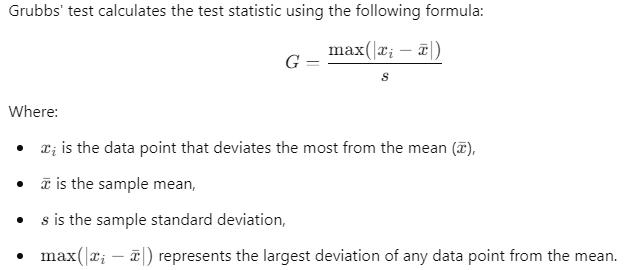

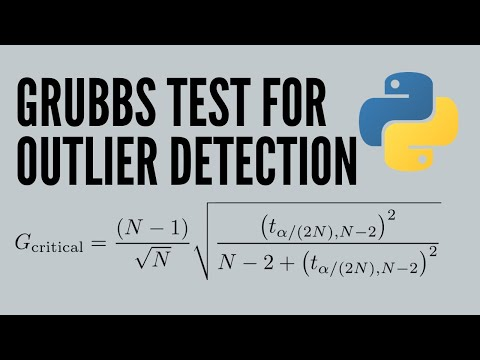




In [68]:
import numpy as np
import scipy.stats as stats

# Sample data with a potential outlier
data = np.array([10, 12, 12, 13, 12, 100, 14, 13, 11])

# Function to calculate the Grubbs' Test statistic
def grubbs_test(data, alpha=0.05):
    xmax = data.max()
    n = len(data)
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1)  # Sample standard deviation
    G_max = np.max(np.abs(data - mean))  # Maximum deviation from the mean
    G = G_max / std_dev
    
    # Calculate the critical value from the Grubbs' Test table
    critical_value = ((n - 1) / np.sqrt(n)) * np.sqrt(stats.t.ppf(1 - alpha / (2 * n), n - 2)**2 / (n - 2 + stats.t.ppf(1 - alpha / (2 * n), n - 2)**2))
    
    return G, critical_value

# Perform Grubbs' Test
G, critical_value = grubbs_test(data)

print(f"Grubbs' Test Statistic: {G}")
print(f"Critical Value: {critical_value}")

# Check if the test statistic exceeds the critical value
if G > critical_value:
    print("Outlier detected!")
else:
    print("No outlier detected.")


Grubbs' Test Statistic: 2.664556706933818
Critical Value: 2.215004223325564
Outlier detected!


**Considerations:**

**One Outlier:** Grubbs' Test is designed to detect only one outlier at a time. If there are multiple outliers, you need to run the test iteratively after removing one outlier at a time.

**Assumption of Normality:** The test assumes that the data follows a normal distribution. If the data is not normally distributed, this method may not perform well.

**Multiple Outliers:** For detecting multiple outliers, repeated application of Grubbs' test can be used (i.e., after removing an outlier, rerun the test until no more outliers are detected).
